In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
df = pd.read_csv('summer-products-with-rating-and-performance_2020-08.csv')

In [3]:
df_cln = pd.read_csv('df_clean.csv')

## __2. EDA__

>### 2.1. Komparasi antara price dan retail price


Retail price digunakan oleh penjual untuk menunjukkan harga normal atau harga sebelum diskon. Bagaimana price, retail price, dan price drop dalam diskon menentukan kesuksesan produk?

C:\Users\BUDI PRIGUNANDA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


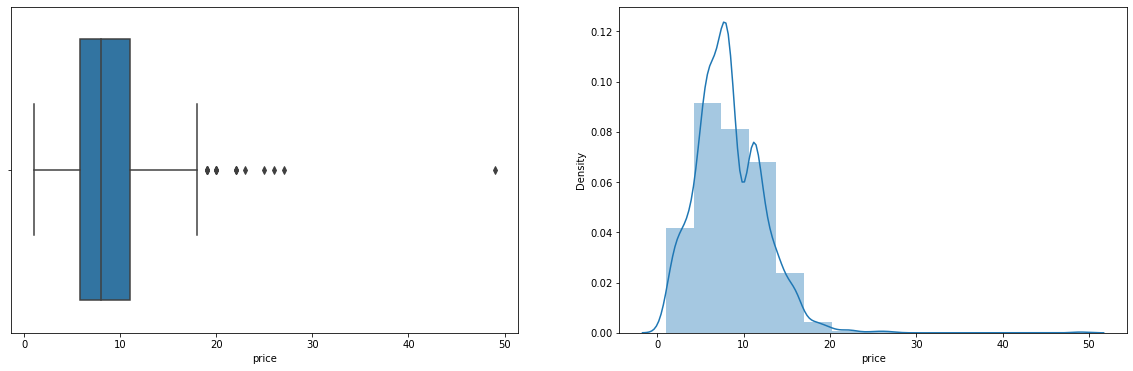

In [39]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.boxplot(data=df_cln, x='price')
plt.subplot(1,2,2)
sns.distplot(df_cln['price'], bins=15)
plt.show()

#### Dari tabel di atas terlihat bahwa rata-rata price/ harga (diskon) baju summer berada pada 7 sampai 12 Euro

C:\Users\BUDI PRIGUNANDA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


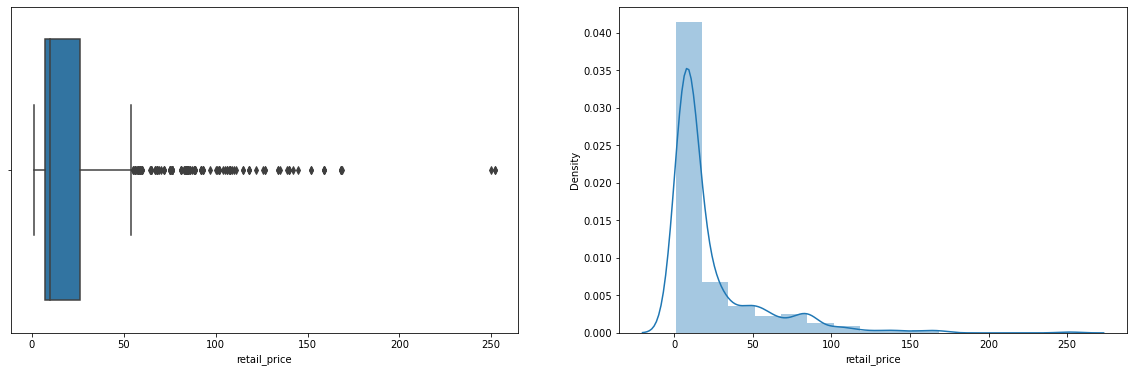

In [40]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.boxplot(data=df_cln, x='retail_price')
plt.subplot(1,2,2)
sns.distplot(df_cln['retail_price'], bins=15)
plt.show()
fig.savefig("retail_price.jpg")

#### Dari tabel di atas terlihat bahwa rata-rata price/ harga (normal) baju summer berada pada 10 sampai 150 Euro

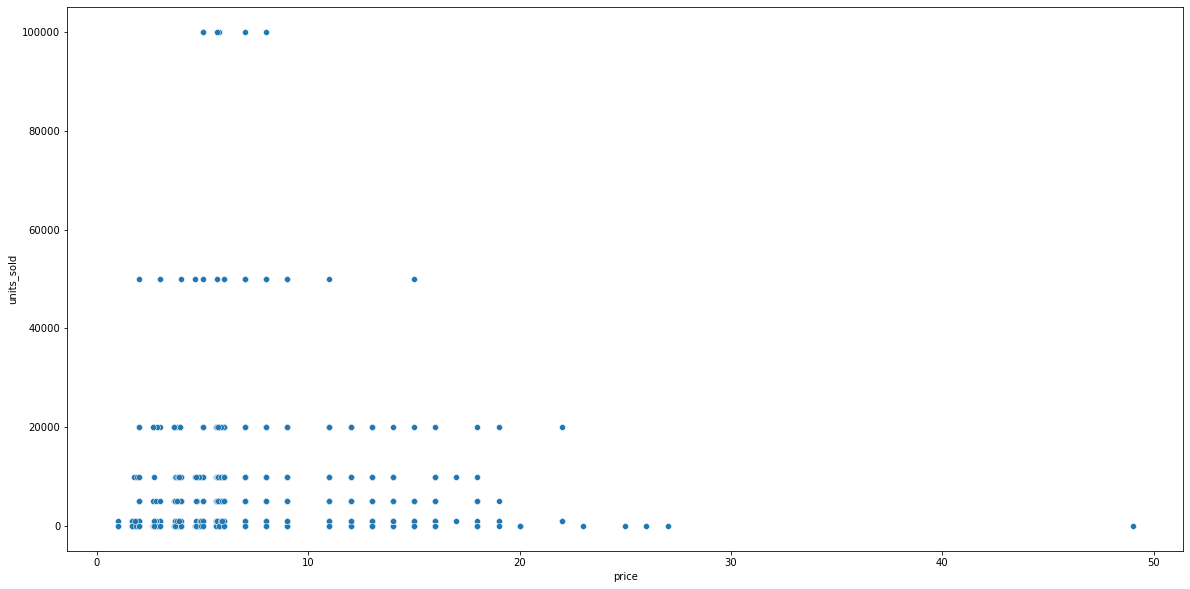

In [6]:
plt.figure(figsize=(20,10))
# plt.scatter(data=df_cln,
sns.scatterplot(data=df_cln,
               x="price",
               y='units_sold')
plt.show()

# sns.boxplot(x='price',y='units_sold',data=df_cln)
# plt.show()

#### Dari plot di atas, penjualan terbanyak dikisaran harga 0 sampai 20 Euro

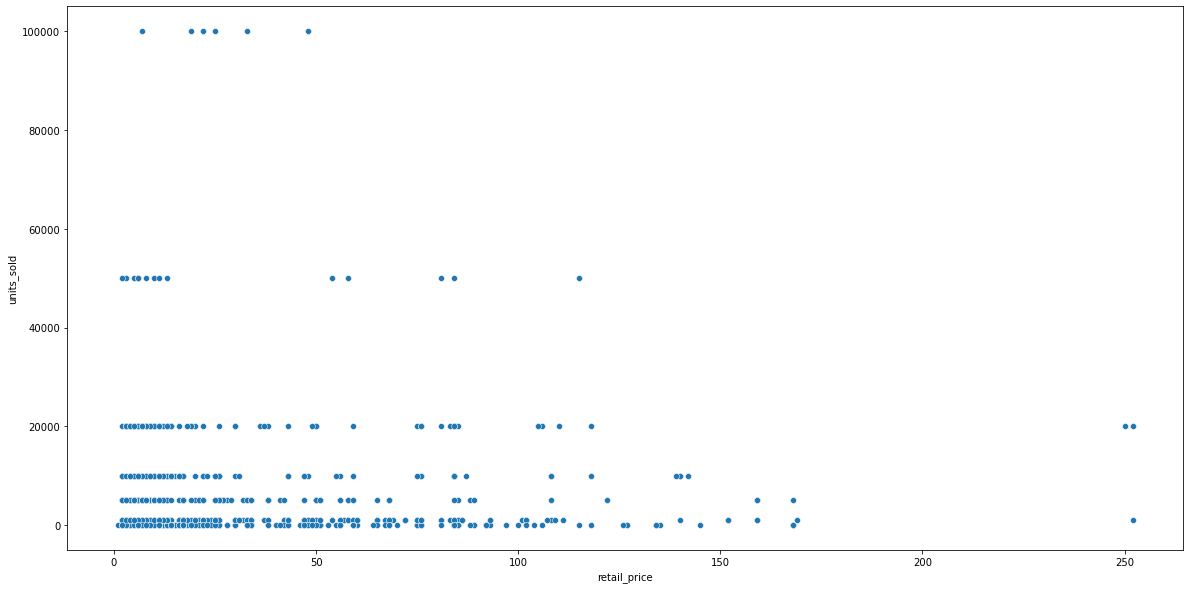

In [7]:
plt.figure(figsize=(20,10))
# plt.scatter(data=df_cln,
sns.scatterplot(data=df_cln,
               x="retail_price",
               y='units_sold')
plt.show()

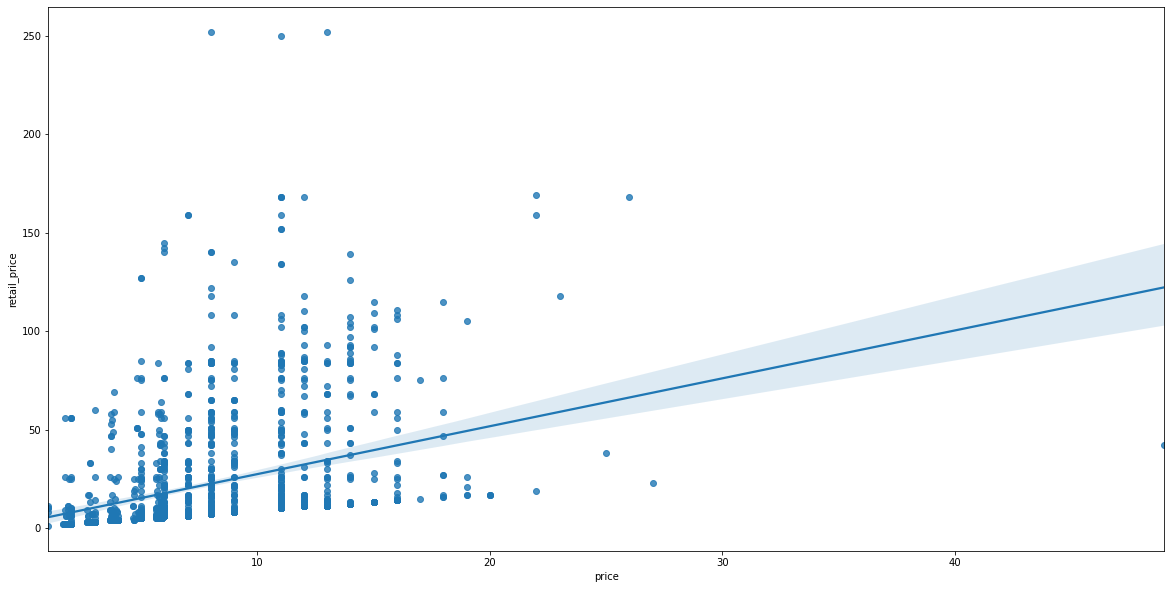

In [8]:
plt.figure(figsize=(20,10))
# # plt.scatter(data=df_cln,
sns.regplot(data=df_cln,
               x="price",
               y='retail_price')


plt.show()


In [9]:
price_cmp=df_cln[['price','retail_price','units_sold']]
price_cmp.describe()
price_cmp.head(15)

,price,retail_price,units_sold
0,16.00,14,100
1,8.00,22,20000
2,8.00,43,100
3,8.00,8,5000
4,2.72,3,100
5,3.92,9,10
6,7.00,6,50000
7,12.00,11,1000
8,11.00,84,100
9,5.78,22,5000


<ipython-input-10-7c8cec546a4a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_cmp['price_drops']=price_cmp["retail_price"]-price_cmp["price"]


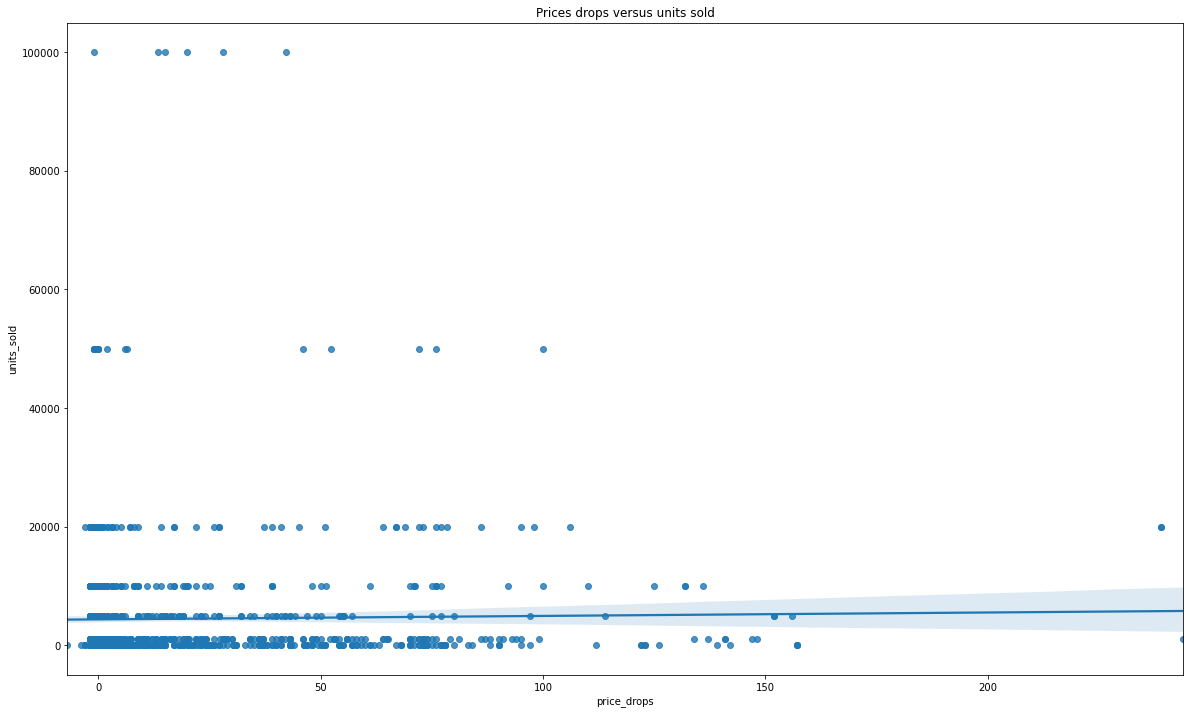

In [10]:
price_cmp['price_drops']=price_cmp["retail_price"]-price_cmp["price"]
plt.figure(figsize=(20,12))
sns.regplot(data=price_cmp,
           x='price_drops',
           y='units_sold')
plt.title('Prices drops versus units sold')
plt.show()

#### Terlihat ada penurunan pada units_sold seiring dengan kenaikan price. Produk dengan sales tertinggi berada dikisaran 0 sampai 20 Euro.
#### Perbedaan antara price dan retail_price cukup besar. Price memiliki IQR lebih baik dibandingkan dengan retail_price yang memiliki outliers jauh lebih signifikan.
#### Price_drops tidak selalu menghasilkan kesuksesan produk.

>### 2.2. Sales dan Origin country

C:\Users\BUDI PRIGUNANDA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


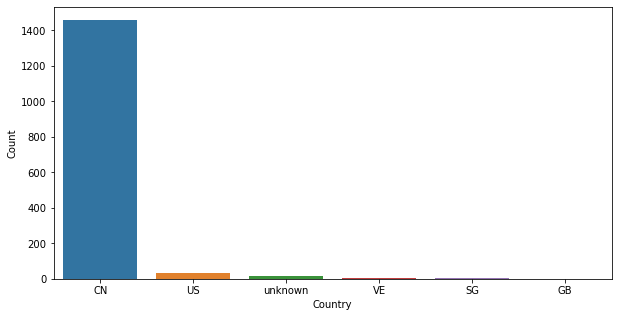

In [11]:
fig, ax = plt.subplots(figsize=(10,5))

sns.countplot('origin_country', data = df_cln, ax=ax)
ax.set(xlabel='Country', ylabel='Count')
plt.show()

[Text(0, 0.5, 'Unit Sold'), Text(0.5, 0, 'origin country')]

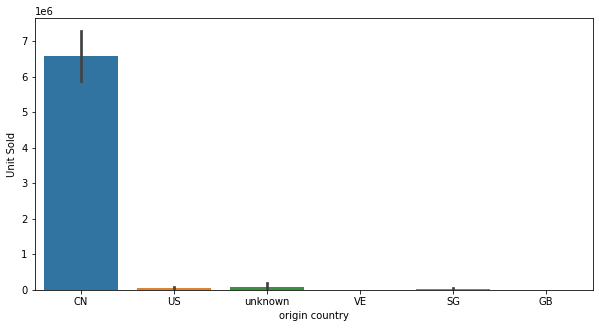

In [12]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x = 'origin_country', y = 'units_sold', data = df_cln,estimator=sum, ax = ax)
ax.set(xlabel='origin country', ylabel='Unit Sold')

#### Dapat di lihat dari bar plot di atas bahwa barang terbanyak berasal dari Negara Cina dan penjualan pun terbanyak dari Cina

>### 2.3 Sales dan Uses ad boosts

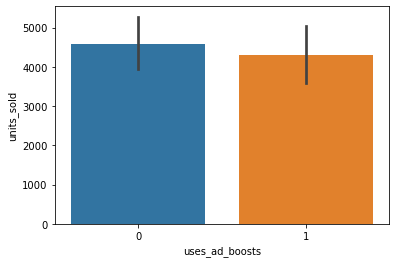

In [13]:
sns.barplot(x='uses_ad_boosts', y='units_sold', data=df_cln)

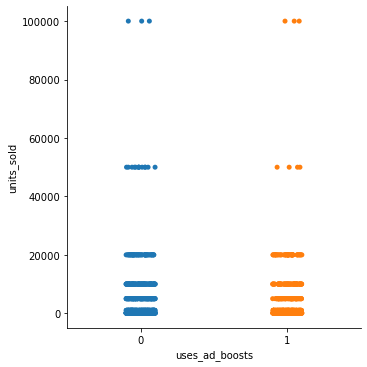

In [14]:
sns.catplot(x='uses_ad_boosts', y='units_sold', data=df_cln)

In [15]:
df_cln['uses_ad_boosts'].value_counts()

0    858
1    656
Name: uses_ad_boosts, dtype: int64

([<matplotlib.patches.Wedge at 0x14dfc1d16d0>,
 [Text(-1.0759307053812048, 0.22885173632267528, 'Use Ad'),
  Text(1.0759307053812048, -0.22885173632267491, 'No use Ad')],
 [Text(-0.5868712938442935, 0.12482821981236832, '43.3%'),
  Text(0.5868712938442935, -0.12482821981236811, '56.7%')])

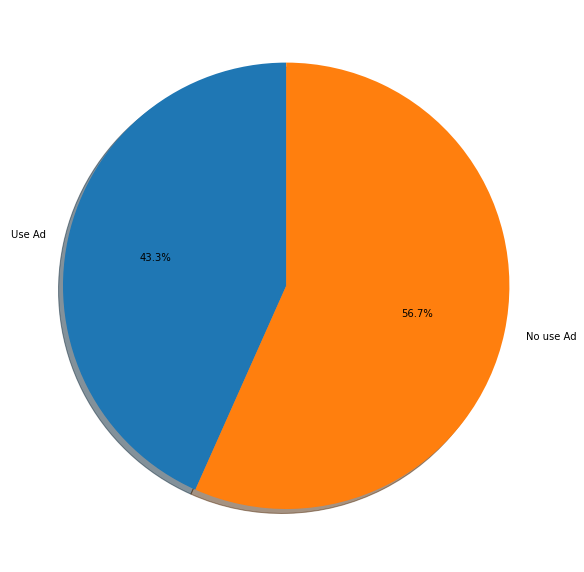

In [16]:
labels = ['Use Ad', 'No use Ad']
sizes = [656, 858]

fig1, ax1 = plt.subplots(figsize=(10,30))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

#### Terlihat dari visualisasi di atas bahwa pengunaan iklan/ use Ad lebih kecil dengan nilai 43.3% sedangkan tidak menggunakan iklan dengan nilai 56.7%

>### 2.4 Sales dan Product color

In [17]:
df['product_color'].value_counts().iloc[:50].to_frame()

,product_color
black,302
white,254
yellow,105
blue,99
pink,99
red,93
green,90
grey,71
purple,53
armygreen,31


In [18]:
df['product_color'] = df['product_color'].replace('White', 'white')
df['product_color'] = df['product_color'].replace('offwhite', 'white')
df['product_color'] = df['product_color'].replace('Black', 'black')
df['product_color'] = df['product_color'].replace('coolblack', 'black')
df['product_color'] = df['product_color'].replace('offblack', 'black')

df['product_color'] = df['product_color'].replace('navyblue', 'blue')
df['product_color'] = df['product_color'].replace('lightblue', 'blue')
df['product_color'] = df['product_color'].replace('skyblue', 'blue')
df['product_color'] = df['product_color'].replace('darkblue', 'blue')
df['product_color'] = df['product_color'].replace('navy', 'blue')
df['product_color'] = df['product_color'].replace('lakeblue', 'blue')
df['product_color'] = df['product_color'].replace('purple', 'blue')
df['product_color'] = df['product_color'].replace('navy blue', 'blue')
df['product_color'] = df['product_color'].replace('prussianblue', 'blue')
df['product_color'] = df['product_color'].replace('Blue', 'blue')
df['product_color'] = df['product_color'].replace('denimblue', 'blue')

df['product_color'] = df['product_color'].replace('winered', 'red')
df['product_color'] = df['product_color'].replace('rosered', 'red')
df['product_color'] = df['product_color'].replace('rose', 'red')
df['product_color'] = df['product_color'].replace('orange-red', 'red')
df['product_color'] = df['product_color'].replace('burgundy', 'red')
df['product_color'] = df['product_color'].replace('lightred', 'red')
df['product_color'] = df['product_color'].replace('coralred', 'red')
df['product_color'] = df['product_color'].replace('wine', 'red')
df['product_color'] = df['product_color'].replace('watermelonred', 'red')
df['product_color'] = df['product_color'].replace('Rose red', 'red')
df['product_color'] = df['product_color'].replace('RED', 'red')
df['product_color'] = df['product_color'].replace('wine red', 'red')

df['product_color'] = df['product_color'].replace('lightpink', 'pink')
df['product_color'] = df['product_color'].replace('beige', 'pink')
df['product_color'] = df['product_color'].replace('camel', 'pink')
df['product_color'] = df['product_color'].replace('apricot', 'pink')
df['product_color'] = df['product_color'].replace('Pink', 'pink')
df['product_color'] = df['product_color'].replace('dustypink', 'pink')

df['product_color'] = df['product_color'].replace('armygreen', 'green')
df['product_color'] = df['product_color'].replace('army green', 'green')
df['product_color'] = df['product_color'].replace('Army green', 'green')
df['product_color'] = df['product_color'].replace('lightgreen', 'green')
df['product_color'] = df['product_color'].replace('fluorescentgreen', 'green')
df['product_color'] = df['product_color'].replace('mintgreen', 'green')
df['product_color'] = df['product_color'].replace('khaki', 'green')
df['product_color'] = df['product_color'].replace('applegreen', 'green')
df['product_color'] = df['product_color'].replace('army', 'green')
df['product_color'] = df['product_color'].replace('darkgreen', 'green')
df['product_color'] = df['product_color'].replace('light green', 'green')

df['product_color'] = df['product_color'].replace('gray', 'grey')
df['product_color'] = df['product_color'].replace('silver', 'grey')
df['product_color'] = df['product_color'].replace('lightgray', 'grey')
df['product_color'] = df['product_color'].replace('lightgrey', 'grey')

df['product_color'] = df['product_color'].replace('lightyellow', 'yellow')

df['product_color'] = df['product_color'].replace('coffee', 'brown')
df['product_color'] = df['product_color'].replace('lightkhaki', 'brown')

df['product_color'] = df['product_color'].replace('rosegold', 'gold')

df['product_color'] = df['product_color'].replace('lightpurple', 'purple')

df['product_color'] = df['product_color'].replace('white & green', 'dual')
df['product_color'] = df['product_color'].replace('black & green', 'dual')
df['product_color'] = df['product_color'].replace('black & white', 'dual')
df['product_color'] = df['product_color'].replace('pink & grey', 'dual')
df['product_color'] = df['product_color'].replace('pink & white', 'dual')
df['product_color'] = df['product_color'].replace('black & blue', 'dual')
df['product_color'] = df['product_color'].replace('white & black', 'dual')
df['product_color'] = df['product_color'].replace('black & yellow', 'dual')
df['product_color'] = df['product_color'].replace('pink & blue', 'dual')
df['product_color'] = df['product_color'].replace('pink & black', 'dual')
df['product_color'] = df['product_color'].replace('blackwhite', 'dual')
df['product_color'] = df['product_color'].replace('black & stripe', 'dual')
df['product_color'] = df['product_color'].replace('white & red', 'dual')
df['product_color'] = df['product_color'].replace('navyblue & white', 'dual')
df['product_color'] = df['product_color'].replace('winered & yellow', 'dual')
df['product_color'] = df['product_color'].replace('gray & white', 'dual')
df['product_color'] = df['product_color'].replace('brown & yellow', 'dual')
df['product_color'] = df['product_color'].replace('orange & camouflage', 'dual')
df['product_color'] = df['product_color'].replace('blue & pink', 'dual')
df['product_color'] = df['product_color'].replace('red & blue','dual')

df['product_color'] = df['product_color'].replace('multicolor', 'other')
df['product_color'] = df['product_color'].replace('floral', 'other')
df['product_color'] = df['product_color'].replace('whitefloral', 'other')
df['product_color'] = df['product_color'].replace('leopard', 'other')
df['product_color'] = df['product_color'].replace('camouflage', 'other')
df['product_color'] = df['product_color'].replace('rainbow', 'other')
df['product_color'] = df['product_color'].replace('star', 'other')
df['product_color'] = df['product_color'].replace('leopardprint', 'other')
df['product_color'] = df['product_color'].replace('violet', 'other')
df['product_color'] = df['product_color'].replace('greysnakeskinprint', 'other')
df['product_color'] = df['product_color'].replace('jasper', 'other')
df['product_color'] = df['product_color'].replace('tan', 'other')
df['product_color'] = df['product_color'].replace('claret', 'other')
df['product_color'] = df['product_color'].replace('ivory', 'other')
df['product_color'] = df['product_color'].replace('whitestripe', 'other')

In [19]:
df['product_color'].value_counts().to_frame()

,product_color
black,308
white,258
blue,217
green,150
red,150
pink,125
yellow,107
grey,86
other,44
dual,41


#### Product color dipadatkan, seperti warna navyblue masuk dalam kelompok blue, dustypink masuk dalam kelompok pink

C:\Users\BUDI PRIGUNANDA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


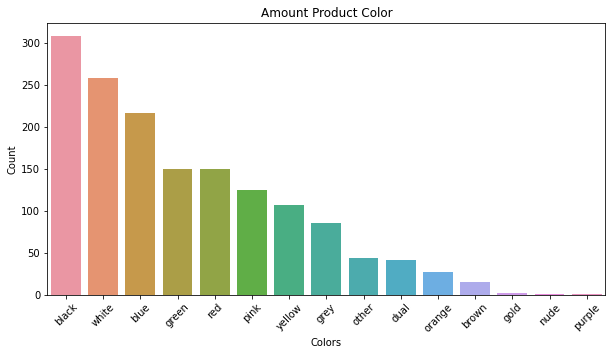

In [20]:
plt.figure(figsize=(10,5))
sns.countplot('product_color', data = df, order = df['product_color'].value_counts().index)
plt.xlabel('Colors')
plt.ylabel('Count')
plt.title('Amount Product Color')
plt.xticks(rotation=45)
plt.show()

#### Product color yang paling banyak ialah warna hitam

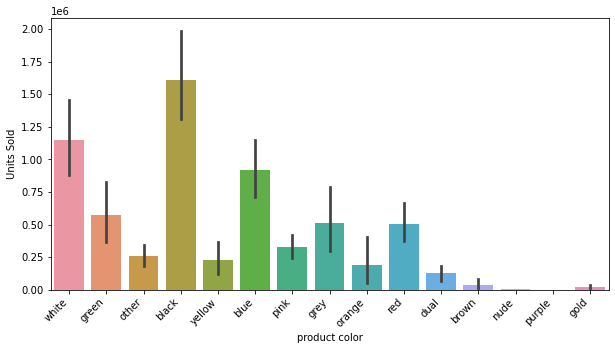

In [21]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x = 'product_color', y = 'units_sold',estimator=sum, data = df, ax = ax)
ax.set(xlabel='product color', ylabel='Units Sold')

plt.xticks(rotation=45, ha='right')
plt.show()

In [22]:
color_sale=df.groupby('product_color')['units_sold'].sum()
color_sale=color_sale.reset_index().sort_values(by='units_sold',ascending=False)
color_sale

,product_color,units_sold
0,black,1609463
13,white,1149227
1,blue,921288
5,green,575245
6,grey,511740
12,red,505800
10,pink,331550
9,other,258850
14,yellow,228212
8,orange,192808


#### Pembelian atau units_sold terbanyak yaitu pakaian warna hitam diikuti oleh warna putih

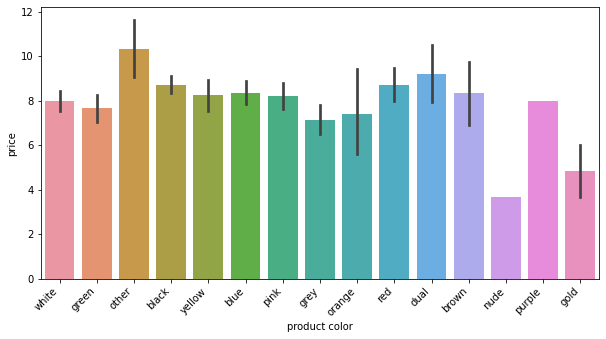

In [23]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x = 'product_color', y = 'price', data = df, ax = ax)
ax.set(xlabel='product color', ylabel='price')

plt.xticks(rotation=45, ha='right')
plt.show()

#### Harga pada warna tidak terdapat perbedaan yang signifikan

>### 2.5. Badge dan Rating terhadap Sales

In [24]:
df_badge = df_cln.copy()
df_badge['badges_count'] = df_badge['badges_count'].replace(0, 'No Badge')
df_badge['badges_count'] = df_badge['badges_count'].replace(1, 'Have Badge')
df_badge['badges_count'] = df_badge['badges_count'].replace(2, 'Have Badge')
df_badge['badges_count'] = df_badge['badges_count'].replace(3, 'Have Badge')

[Text(0, 0.5, 'Unit Sold'), Text(0.5, 0, 'Amount Badge')]

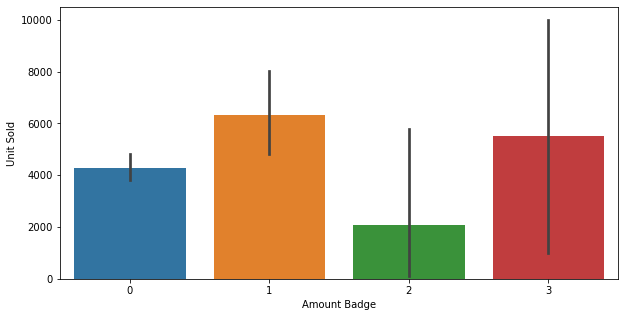

In [25]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x = 'badges_count', y = 'units_sold', data = df_cln, ax = ax)
ax.set(xlabel='Amount Badge', ylabel='Unit Sold')

[Text(0, 0.5, 'Unit Sold'), Text(0.5, 0, 'Amount Badge')]

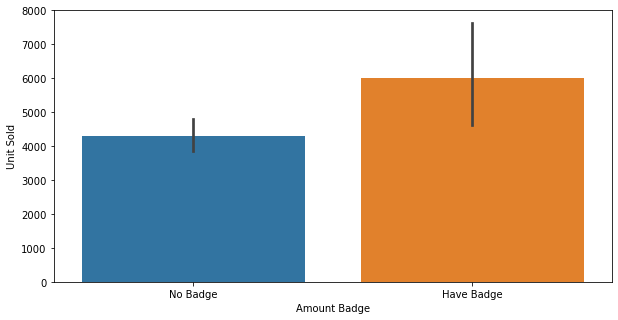

In [26]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x = 'badges_count', y = 'units_sold', data = df_badge, ax = ax)
ax.set(xlabel='Amount Badge', ylabel='Unit Sold')

#### Dapat dilihat dari barplot diatas, produk yang terjual rata-rata adalah merchant yang memiliki badge

In [27]:
df_rating = df_cln.copy()
df_rating = df_rating.astype({'rating':'int','merchant_rating':'int'})

[Text(0, 0.5, 'Unit Sold'), Text(0.5, 0, 'Rating')]

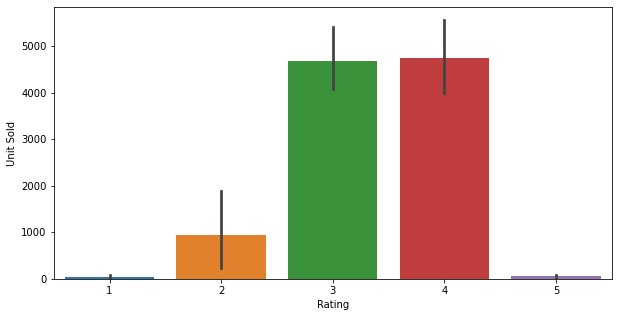

In [28]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x = 'rating', y = 'units_sold', data = df_rating, ax = ax)
ax.set(xlabel='Rating', ylabel='Unit Sold')


[Text(0, 0.5, 'Price'), Text(0.5, 0, 'Rating')]

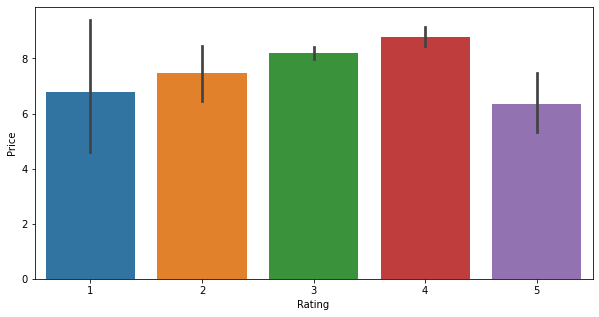

In [29]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x = 'rating', y = 'price', data = df_rating, ax = ax)
ax.set(xlabel='Rating', ylabel='Price')

#### Rating terhadap units_sold menunjukan bahwa rating 3 ke atas menunjang penjualan yang menandakan rating 
#### berpengaruh terhadap penjualan, serta penjualan yang memiliki badge lebih tinggi penjualannya

>### 2.6. Size terhadap Sales

In [30]:
def df_Size(name):
    if name == 'S' \
    or name == 'XS' \
    or name == 'XXS' \
    or name == 'XXXS' \
    or name == 'M' \
    or name == 'L' \
    or name == 'XL' \
    or name == 'XXL' \
    or name == 'XXXL' \
    or name == 'XXXXL' \
    or name == 'XXXXXL' :
        return name
    else:
        return 'OTHER'
    
df['product_variation_size_id'] = df['product_variation_size_id'].apply(df_Size)

In [31]:
df['product_variation_size_id'].value_counts().to_frame()

,product_variation_size_id
S,641
XS,356
M,200
OTHER,184
XXS,100
L,49
XL,17
XXL,15
XXXS,6
XXXXL,2


C:\Users\BUDI PRIGUNANDA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


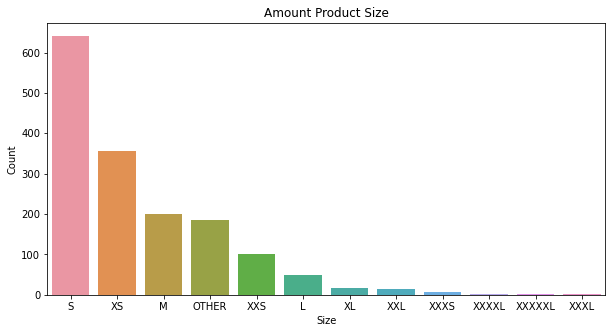

In [32]:
plt.figure(figsize=(10,5))
sns.countplot('product_variation_size_id', data = df, order = df['product_variation_size_id'].value_counts().index)
plt.xlabel('Size')
plt.ylabel('Count')
plt.title('Amount Product Size')
plt.show()

#### Produk terbanyak yaitu pakaian ukuran S

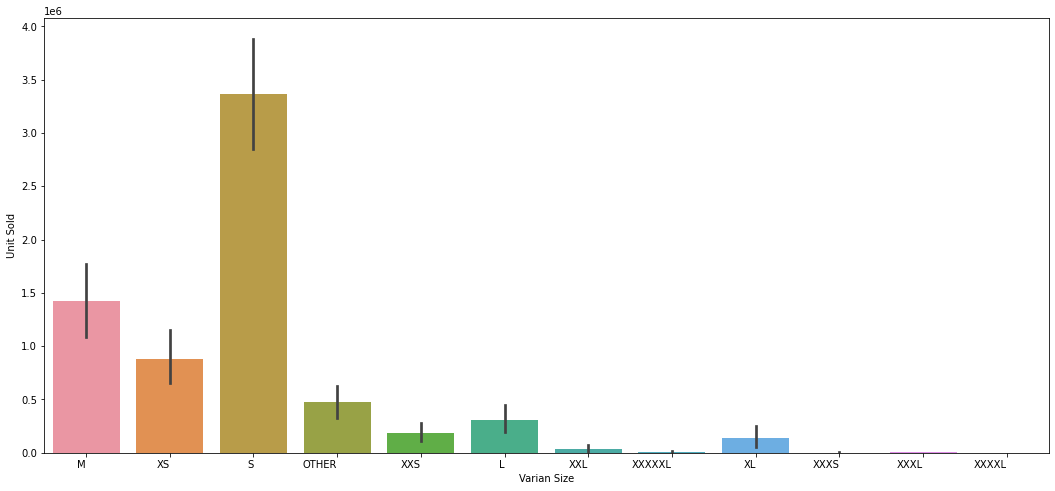

In [33]:
fig, ax = plt.subplots(figsize=(18, 8))
sns.barplot(x = 'product_variation_size_id', y = 'units_sold',estimator = sum, data = df, ax = ax)
ax.set(xlabel='Varian Size', ylabel='Unit Sold')

plt.xticks(ha='right')
plt.show()

#### Unit_solds tertinggi yaitu pakaian dengan Varian size kecil seperti S,M,XS 

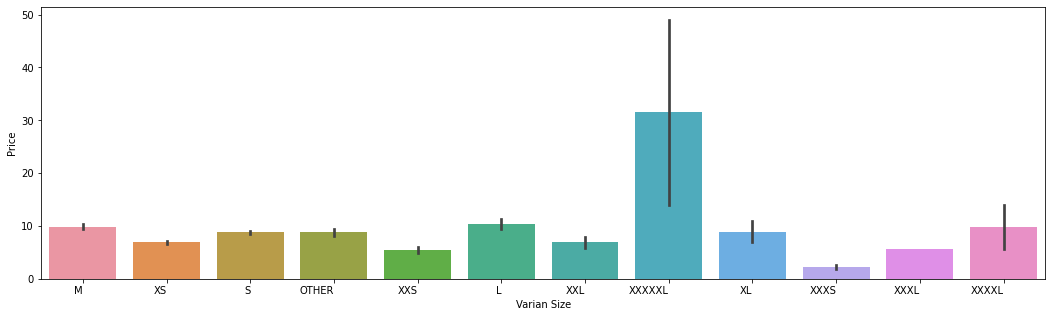

In [34]:
fig, ax = plt.subplots(figsize=(18, 5))
sns.barplot(x = 'product_variation_size_id', y = 'price', data = df, ax = ax)
ax.set(xlabel='Varian Size', ylabel='Price')

plt.xticks(ha='right')
plt.show()

#### Price tidak terlalu ada perbedaan yang signifikan
#### Price pada Varian size XXXXXL paling tinggi 

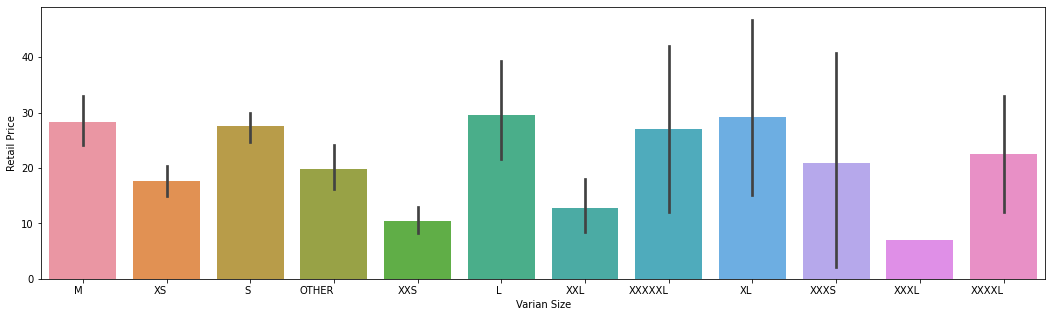

In [35]:
fig, ax = plt.subplots(figsize=(18, 5))
sns.barplot(x = 'product_variation_size_id', y = 'retail_price', data = df, ax = ax)
ax.set(xlabel='Varian Size', ylabel='Retail Price')

plt.xticks(ha='right')
plt.show()

#### Perbedaan Price dan Retail Price terhadap Size terlihat cukup jauh, retail price memiliki harga lebih tinggi

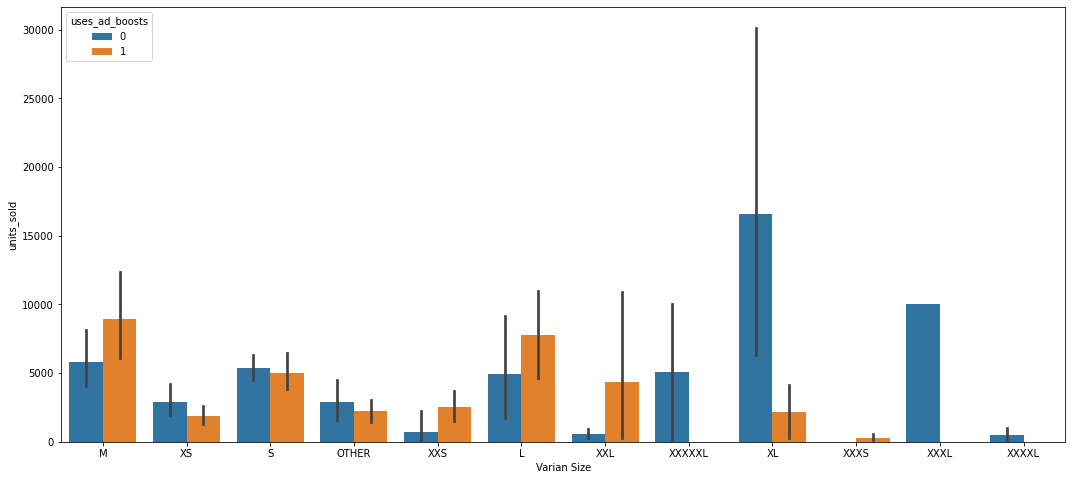

In [41]:
fig, ax = plt.subplots(figsize=(18, 8))
sns.barplot(x = 'product_variation_size_id', y = 'units_sold', data = df, ax = ax, hue= 'uses_ad_boosts')
ax.set(xlabel='Varian Size', ylabel='units_sold')

plt.xticks()
plt.show()

#### Penggunaan iklan tidak terlalu berpengaruh terhadap penjualan